### Natural Language Processing with Disaster Tweets

In this week's project, we are participating in Kaggle's competition. We will build a recurrent neural network (RNN) [https://en.wikipedia.org/wiki/Recurrent_neural_network]. This will be implemented using 
tensorflow keras sequential model [https://www.tensorflow.org/guide/keras/sequential_model].

The data comes from Kaggle Competition: Addison Howard, devrishi, Phil Culliton, Yufeng Guo. (2019). Natural Language Processing with Disaster Tweets. Kaggle. https://kaggle.com/competitions/nlp-getting-started

Since we are working with natural language processing, we will make use of the python natural language toolkit [https://github.com/nltk/nltk/wiki] to perform some simple natural language processing (i.e., text cleaning and reformatting).

In the model training procedure, we will focus on tuning the RNN model's initial learning rate and activation function to achieve a best model performance. Finally, we will conclude what we have learnt from this project.

Github Repository: https://github.com/dfu2020/DTSA-5511/tree/main/Week4

### Import Libraries

In [152]:
# Importing  Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
tf.random.set_seed(101)
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score

### EDA and data cleaning

In [38]:
train_df = pd.read_csv("week4_data/train.csv")
test_df = pd.read_csv("week4_data/test.csv")

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
print(train_df.describe())

                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


In [40]:
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [45]:
# From above, we see that keyword and location has some NaN values,
# for the purpose of NLP training, the most important features are
# included in the text column, thus we only keep "id", "text", "target"
# in the training dataframe, and "id", "text" in the test dataframe.
tweets_train_df = train_df[["id", "text", "target"]].sort_values(by = "id")
tweets_test_df = test_df[["id", "text"]].sort_values(by = "id")

# Updated training dataframe
tweets_train_df.head(10)

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
5,8,#RockyFire Update => California Hwy. 20 closed...,1
6,10,#flood #disaster Heavy rain causes flash flood...,1
7,13,I'm on top of the hill and I can see a fire in...,1
8,14,There's an emergency evacuation happening now ...,1
9,15,I'm afraid that the tornado is coming to our a...,1


In [47]:
# Create a function to perform data cleaning
def clean_data(text):
    # first tokenize the text in each string
    tokens = word_tokenize(text)
    # remove numbers 
    words = [word for word in tokens if word.isalpha()]
    # remove stop words using nltk
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # calling porterstemmer to stem the vocabulary to
    # common form
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in words]
    text = ' '.join(stemmed)
    return text


In [48]:
# before and after the cleaning.
tweets_train_df['text_num'] =tweets_train_df['text'].apply(lambda x: len(word_tokenize(x)))
tweets_train_df['clean_text'] = tweets_train_df['text'].apply(lambda x: clean_data(x))
tweets_train_df['clean_text_num']=tweets_train_df['clean_text'].apply(lambda x: len(word_tokenize(x)))

tweets_test_df['text_num'] =tweets_test_df['text'].apply(lambda x: len(word_tokenize(x)))
tweets_test_df['clean_text'] = tweets_test_df['text'].apply(lambda x: clean_data(x))
tweets_test_df['clean_text_num']= tweets_test_df['clean_text'].apply(lambda x: len(word_tokenize(x)))

In [49]:
# We can see that the clean_text now removes all the special characters and shortens the tweet
tweets_train_df

,id,text,target,text_num,clean_text,clean_text_num
0,1,Our Deeds are the Reason of this #earthquake M...,1,14,our deed reason earthquak may allah forgiv us,8
1,4,Forest fire near La Ronge Sask. Canada,1,8,forest fire near la rong sask canada,7
2,5,All residents asked to 'shelter in place' are ...,1,24,all resid ask place notifi offic no evacu shel...,12
3,6,"13,000 people receive #wildfires evacuation or...",1,9,peopl receiv wildfir evacu order california,6
4,7,Just got sent this photo from Ruby #Alaska as ...,1,18,just got sent photo rubi alaska smoke wildfir ...,10
...,...,...,...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1,13,two giant crane hold bridg collaps nearbi home...,9
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1,24,thetawniest the control wild fire california e...,12
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,15,utc s volcano hawaii http,5
7611,10872,Police investigating after an e-bike collided ...,1,21,polic investig collid car littl portug rider s...,11


/var/folders/mf/6p75cz_100v22mptnl137bwc0000gq/T/ipykernel_98445/3495285707.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/mf/6p75cz_100v22mptnl137bwc0000gq/T/ipykernel_98445/3495285707.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


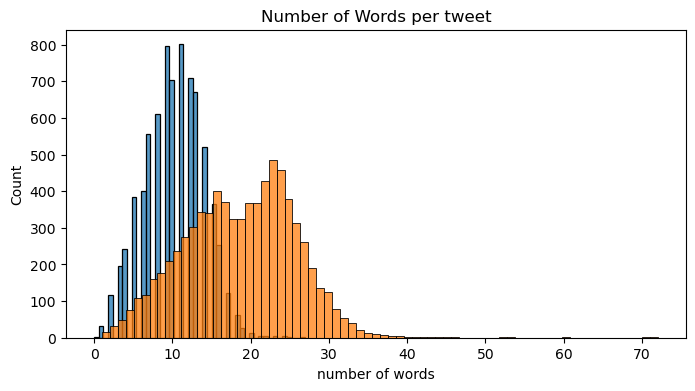

In [51]:
# number of tokens (words) per tweet
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(
    data = tweets_train_df, 
    x = 'clean_text_num',
    palette = 'blue'
    ).set(
        title = 'Number of Words per tweet')
sns.histplot(
    data = tweets_train_df, 
    x = 'text_num',
    palette = 'red'
    ).set(
        title = 'Number of Words per tweet')
plt.xlabel('number of words')
plt.show()

### Model Setup and Training

In [129]:
# Feature extraction on training data
train_task = tweets_train_df["clean_text"].tolist()
vector = TfidfVectorizer(max_features=1000)
intermediate_response = vector.fit(train_task)

train_and_val = intermediate_response.transform(tweets_train_df["clean_text"]).todense()

X_train, X_val, y_train, y_val = train_test_split(
    train_and_val, 
    tweets_train_df["target"],
    test_size=0.15,
    random_state=42)

X_test = inter_response.transform(tweets_test_df["clean_text"]).todense()

In [74]:
# Check the dimensions of the training and validation size
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape)


(6471, 1000) (1142, 1000) (3263, 1000)
(6471,) (1142,)


In [173]:
def gridSearch_RNN(lr_list, act_list, X_train, y_train):
    """
        Hyperparameter tuning for the RNN training process
        Input: list of learning rates, X_train, y_train
        Output: (best_history, float best_lr) current_best[1:]
    """
    callbacks_list =  [tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 5, mode = "min")]

    # initialize an empty validation accuracy
    current_best = (0, None, None)
    for lr in lr_list:
        print("Now fitting model with initial learning rate", lr)
        for act in act_list:
            print("Now fitting model with activation function", act)
            lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate = lr,
                decay_steps = 1000,
                decay_rate=0.9
            ) 
            model = tf.keras.Sequential()
            model.add(tf.keras.Input(shape = (1000, )))
            model.add(tf.keras.layers.Dense(128, activation = act))
            model.add(tf.keras.layers.Dropout(0.25))
            model.add(tf.keras.layers.Dense(128, activation = act))
            model.add(tf.keras.layers.Dropout(0.25))
            model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))  
            model.compile(
                optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = lr_schedule),
                loss = "binary_crossentropy",
                metrics = ["accuracy"] )
            this_history = model.fit(X_train,
                                y = y_train,
                                validation_data = (X_val, y_val),
                                epochs = 50,
                                callbacks = callbacks_list,
                                verbose = 0
                            )
            print("Got last validation accuracy of:", this_history.history["val_accuracy"][-1])
            if this_history.history["val_accuracy"][-1] > current_best[0]:
                current_best = (this_history.history["val_accuracy"][-1], this_history, lr)
        
    return(current_best[1:])

In [174]:
# Hyperparameter tuning
lr_list = [1e-5,1e-4, 1e-3,1e-2]
act_list = ["relu", "sigmoid", "tanh"]
(best_history, best_lr) = gridSearch_RNN(lr_list,act_list, X_train, y_train)

Now fitting model with initial learning rate 1e-05
Now fitting model with activation function relu
Got last validation accuracy of: 0.6777583360671997
Now fitting model with activation function sigmoid
Got last validation accuracy of: 0.5700525641441345
Now fitting model with activation function tanh
Got last validation accuracy of: 0.764448344707489
Now fitting model with initial learning rate 0.0001
Now fitting model with activation function relu
Got last validation accuracy of: 0.7942206859588623
Now fitting model with activation function sigmoid
Got last validation accuracy of: 0.7723292708396912
Now fitting model with activation function tanh
Got last validation accuracy of: 0.7863397598266602
Now fitting model with initial learning rate 0.001
Now fitting model with activation function relu
Got last validation accuracy of: 0.7767075300216675
Now fitting model with activation function sigmoid
Got last validation accuracy of: 0.792469322681427
Now fitting model with activation funct

In [175]:
best_history.model.summary()

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_249 (Dense)           (None, 128)               128128    
                                                                 
 dropout_166 (Dropout)       (None, 128)               0         
                                                                 
 dense_250 (Dense)           (None, 128)               16512     
                                                                 
 dropout_167 (Dropout)       (None, 128)               0         
                                                                 
 dense_251 (Dense)           (None, 1)                 129       
                                                                 
Total params: 144769 (565.50 KB)
Trainable params: 144769 (565.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [176]:
best_history.history["val_accuracy"]

[0.5700525641441345,
 0.5726795196533203,
 0.7005254030227661,
 0.7583187222480774,
 0.7758318781852722,
 0.7898423671722412,
 0.7837128043174744,
 0.7898423671722412,
 0.7880910634994507,
 0.7880910634994507,
 0.7907180190086365,
 0.7942206859588623]

### Visualization

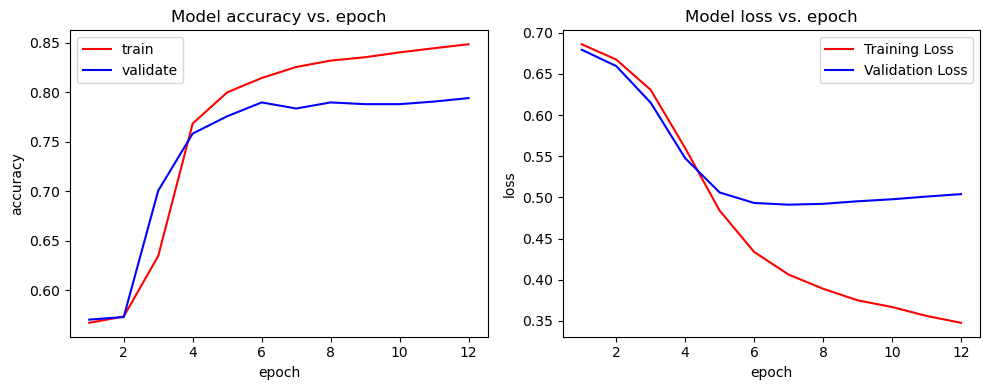

In [177]:
fig, ((ax1, ax2)) = plt.subplots(nrows= 1,ncols=2, figsize=(10,4))
ax1.plot(np.arange(1,13), best_history.history["accuracy"], zorder = 0,color='red', label = "train")
ax1.plot(np.arange(1,13), best_history.history["val_accuracy"], zorder = 1, color='blue',label = "validate")
ax1.legend()
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.set_title('Model accuracy vs. epoch')

ax2.plot(np.arange(1,13), best_history.history["loss"], zorder = 0, color='red',label = "Training Loss")
ax2.plot(np.arange(1,13), best_history.history["val_loss"], zorder = 1, color='blue',label = "Validation Loss")
ax2.legend()
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.set_title('Model loss vs. epoch')
plt.tight_layout()

In [178]:
y_train_pred = best_history.model.predict(X_train)
y_train_pred = y_train_pred.reshape(y_train_pred.shape[0], )
y_train_pred = y_train_pred.tolist()
y_train_pred = [round(y_train_pred[i]) for i in range(len(y_train_pred))]

  1/203 [..............................] - ETA: 6s

203/203 [==============================] - 0s 518us/step


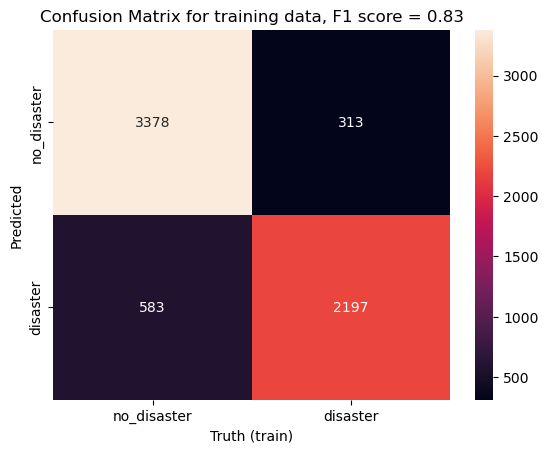

In [179]:
train_confusion_matrix = confusion_matrix(y_train.tolist(), y_train_pred)
train_f1 = f1_score(y_train.tolist(), y_train_pred) 
sns.heatmap(train_confusion_matrix, fmt='g',annot=True,
            xticklabels=['no_disaster', 'disaster'],
            yticklabels=['no_disaster', 'disaster'])
plt.ylabel('Predicted')
plt.xlabel('Truth (train)')
plt.title('Confusion Matrix for training data, F1 score = {}'.format(round(train_f1, 2)),fontsize=12)
plt.show()

In [180]:
y_val_pred = best_history.model.predict(X_val)
y_val_pred = y_val_pred.reshape(y_val_pred.shape[0], )
y_val_pred = y_val_pred.tolist()
y_val_pred = [round(y_val_pred[i]) for i in range(len(y_val_pred))]

36/36 [==============================] - 0s 556us/step


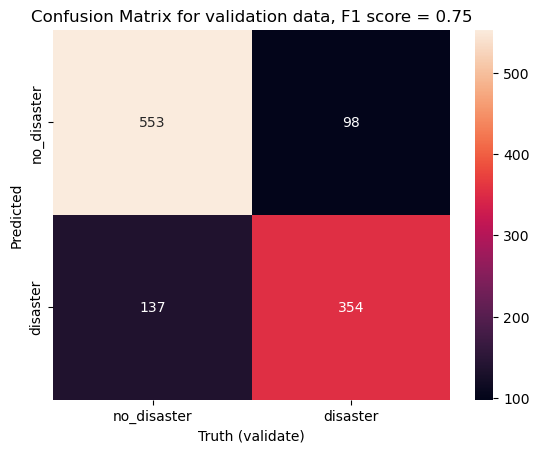

In [181]:
val_confusion_matrix = confusion_matrix(y_val.tolist(), y_val_pred)
val_f1 = f1_score(y_val.tolist(), y_val_pred)
sns.heatmap(val_confusion_matrix, fmt='g',annot=True,
            xticklabels=['no_disaster', 'disaster'],
            yticklabels=['no_disaster', 'disaster'])
plt.ylabel('Predicted')
plt.xlabel('Truth (validate)')
plt.title('Confusion Matrix for validation data, F1 score = {}'.format(round(val_f1, 2)),fontsize=12)
plt.show()

In [148]:
#Make test set predictions

yhat = best_history.model.predict(X_test)
yhat = yhat.reshape(yhat.shape[0], )
yhat = yhat.tolist()
predictions = [round(yhat[i]) for i in range(len(yhat))]
tweets_test_df["target"] = predictions
# dropping all other columns and only include "id" and "target",
# to match with sample_submission.csv format
tweets_test_submission = tweets_test_df[["id", "target"]].sort_values(by = "id")
tweets_test_submission.set_index(['id'],inplace=True)
tweets_test_submission.to_csv("./week4_Prediction.csv")

102/102 [==============================] - 0s 557us/step


In [149]:
tweets_test_submission

,target
id,
0,1
2,1
3,1
9,1
11,1
...,...
10861,1
10865,1
10868,1


### Summary

Through this project, we classified tweets as related to disaster or not using NLP methods and recurrent neural networks (RNN). WE used NLTK packages to clean up the text in the tweets. In setting up the RNN models, I performed hyperparameter tuning on a variety of initial learning rates (from 1e-5 to 1e-2) and activation functions ('sigmoid', 'relu', 'tanh'), and chose the the learning rate with the best performance. The best model using "relu" activation function and a learning rate of 0.0001 resulted in a validation accuracy of 0.794, and a F1 score of 0.83 for the training data, and a F1 score of 0.75 for the validation data. In the Kaggle competition, my submission had a score of 0.774. The final model still has plenty of room for improvement, such as using more dense layers for the classification, or implement more advanced architectures such as Long Short Term Memory (LSTM) models.